In [1]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sys.path.append('../../')
from classes.Datasets import FundamentalsDataset

In [2]:
fundamentals = FundamentalsDataset()
fundamentals.reorder_columns()
fundamentals.adjust_price_w_CPI()
fundamentals.drop_redundant_features()
fundamentals.dropna()

In [10]:
train, valid = fundamentals.get_train_valid(val_split_point=datetime.datetime(2021, 1, 1), train_valid_gap=365)
print(fundamentals.df)

                    cashAndCashEquivalents  shortTermInvestments  \
symbol fillingDate                                                 
A      2000-03-15             2.488071e+09          7.638815e+07   
       2000-06-12             1.762100e+09          0.000000e+00   
       2000-09-01             1.253420e+09          0.000000e+00   
       2001-01-17             1.763573e+09          0.000000e+00   
       2001-03-19             7.592714e+08          0.000000e+00   
...                                    ...                   ...   
ZYXI   2022-10-27             2.443491e+07          0.000000e+00   
       2023-03-14             2.074544e+07          0.000000e+00   
       2023-04-27             1.713189e+07          0.000000e+00   
       2023-07-27             5.953711e+07          0.000000e+00   
       2023-10-26             4.257729e+07          9.938072e+06   

                    netReceivables  totalCurrentAssets  \
symbol fillingDate                                       

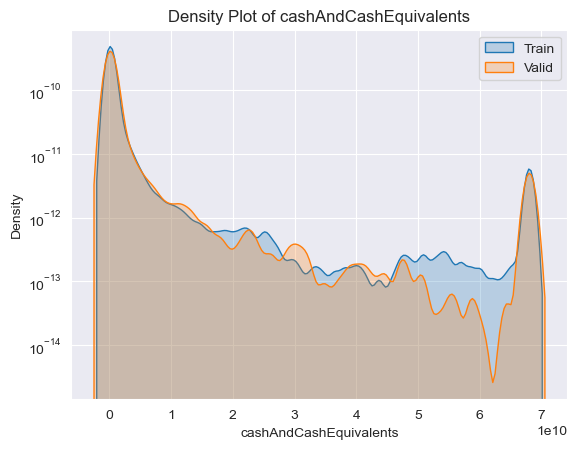

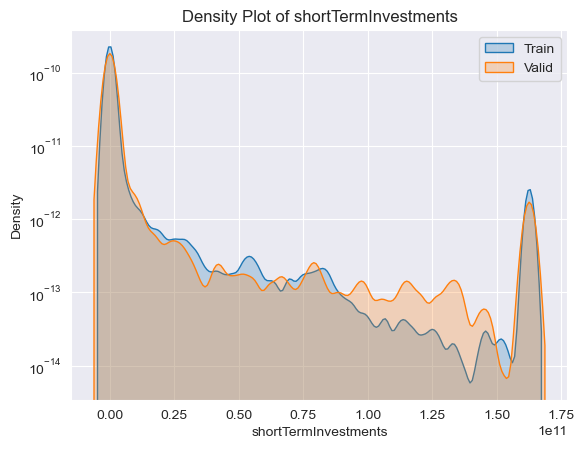

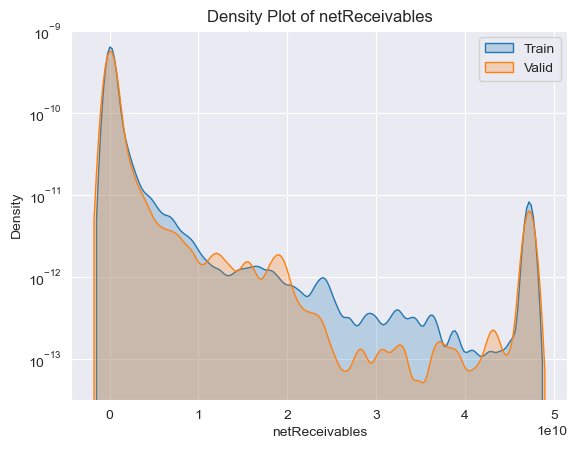

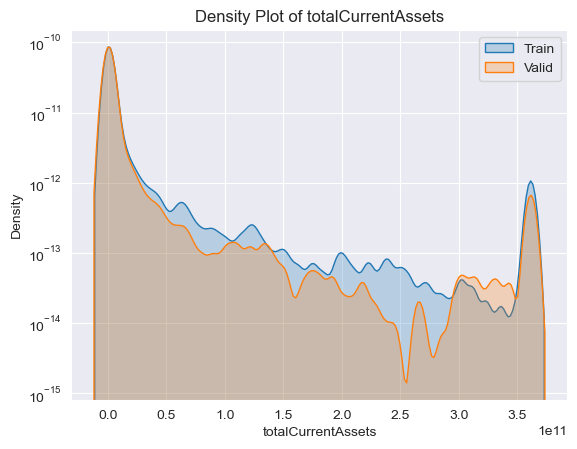

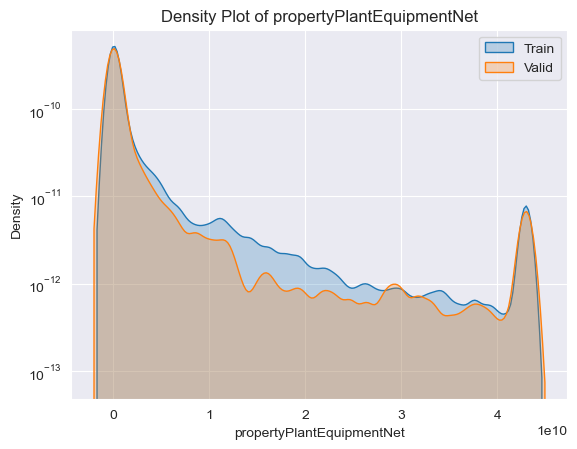

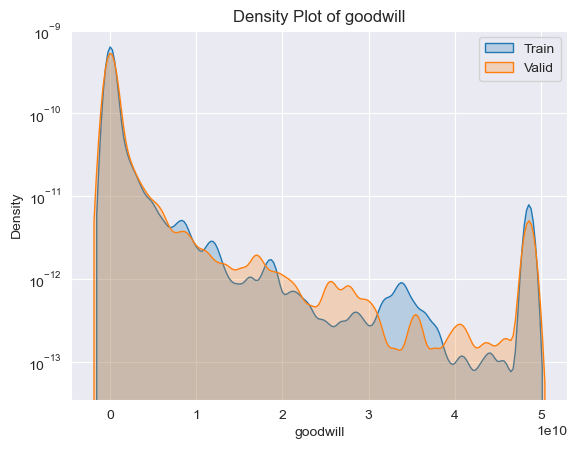

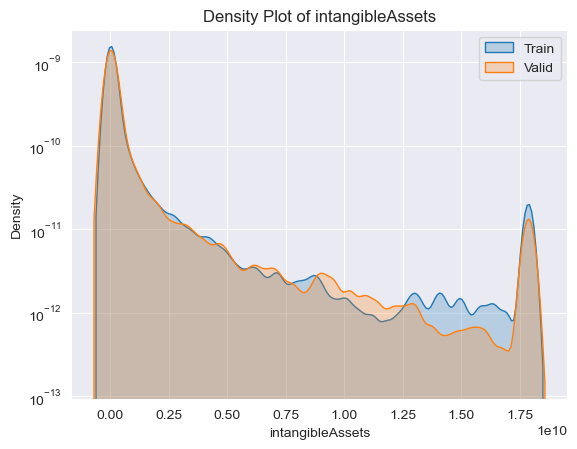

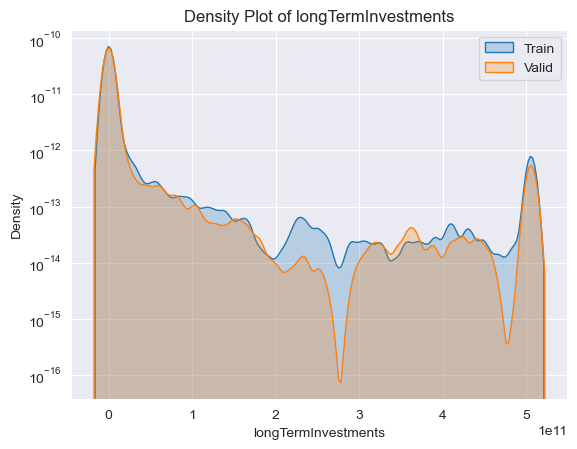

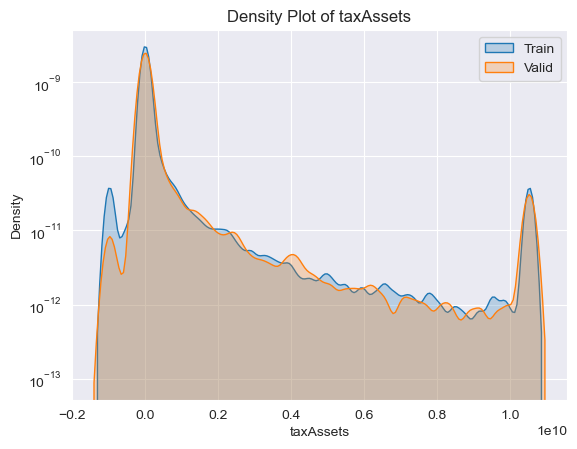

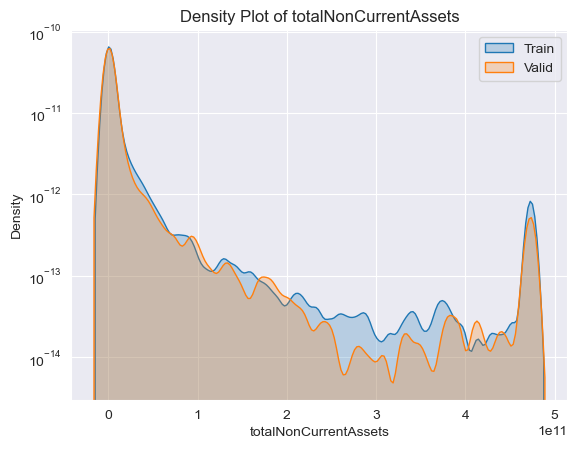

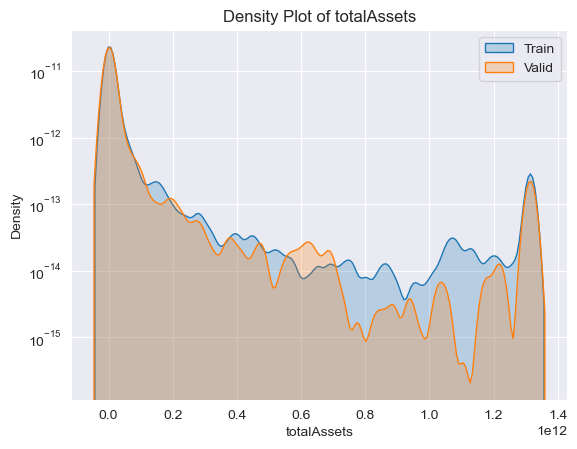

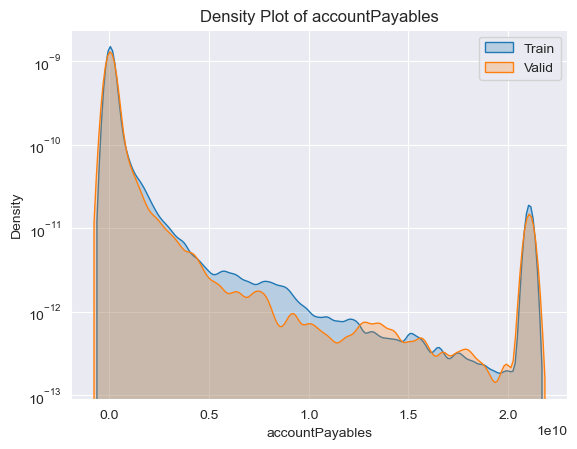

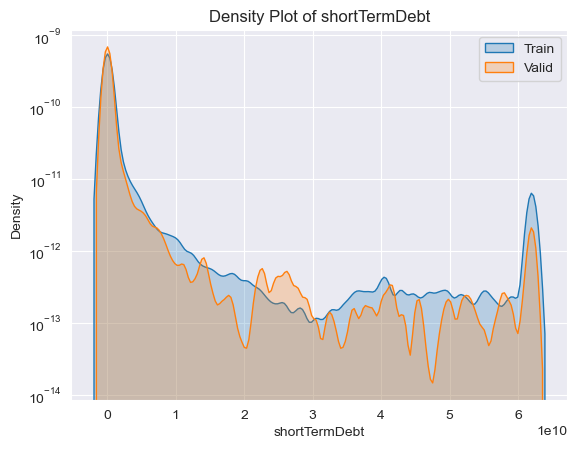

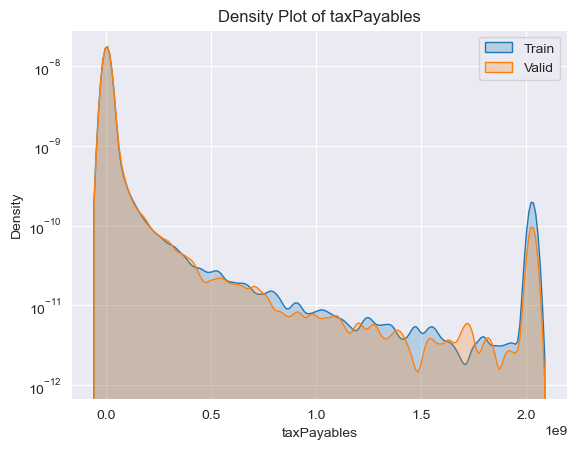

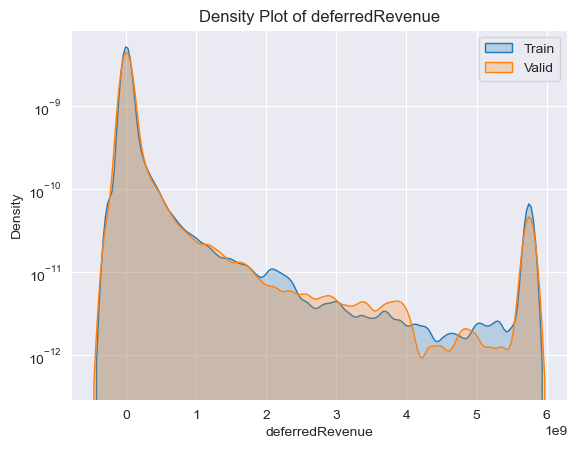

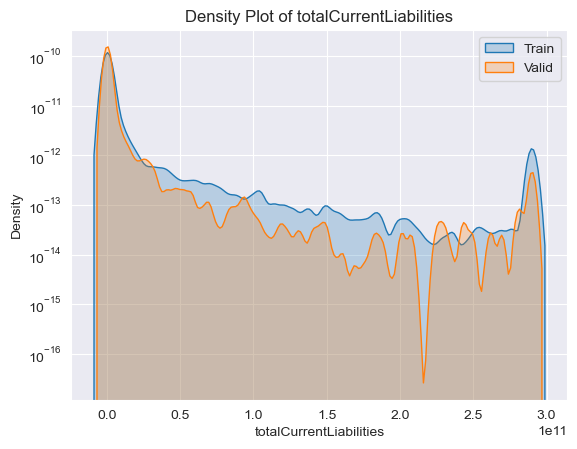

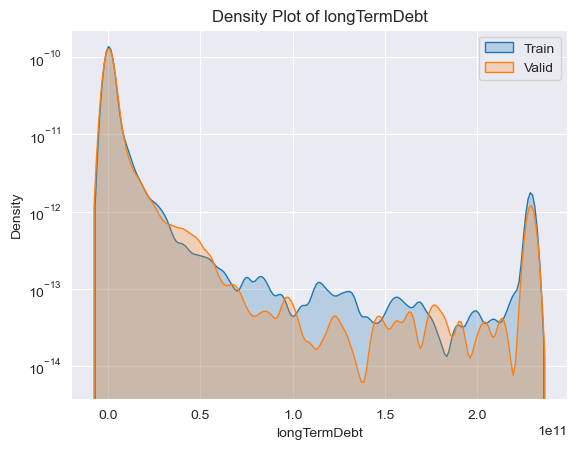

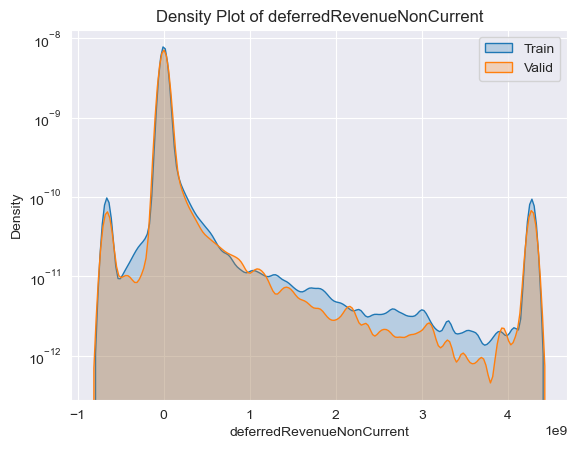

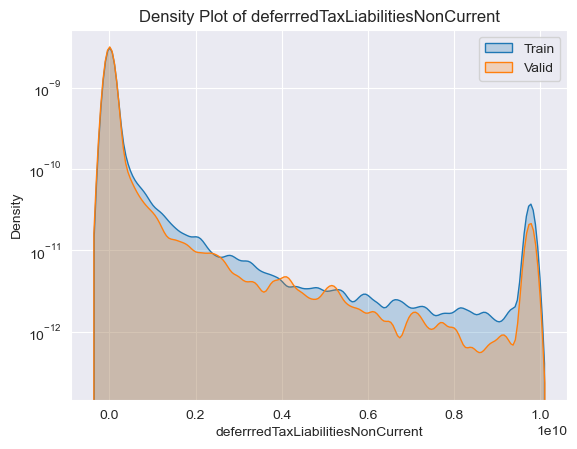

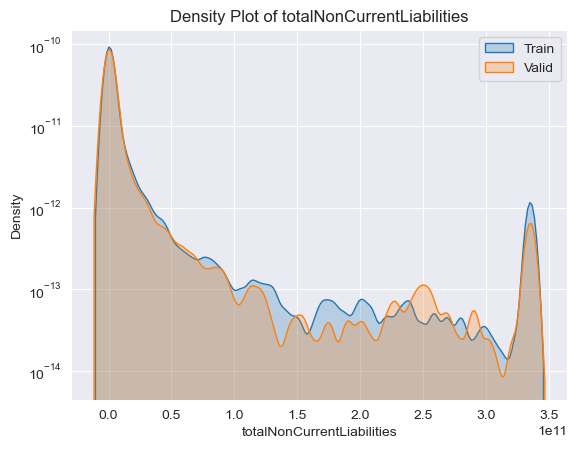

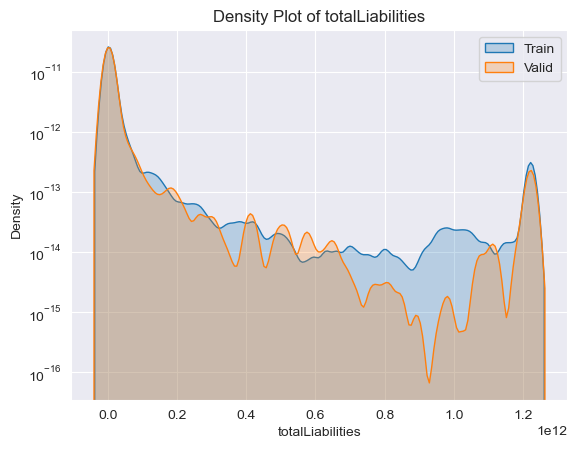

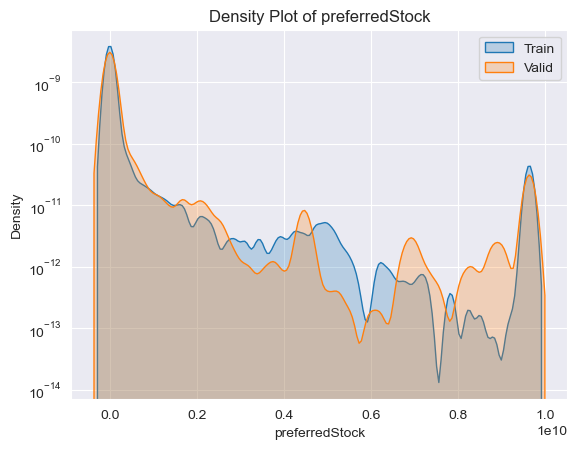

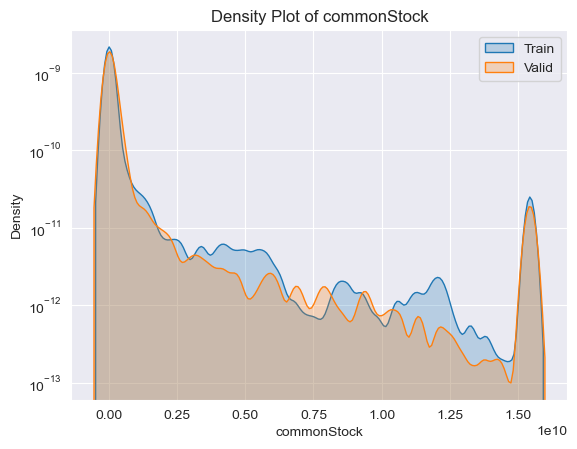

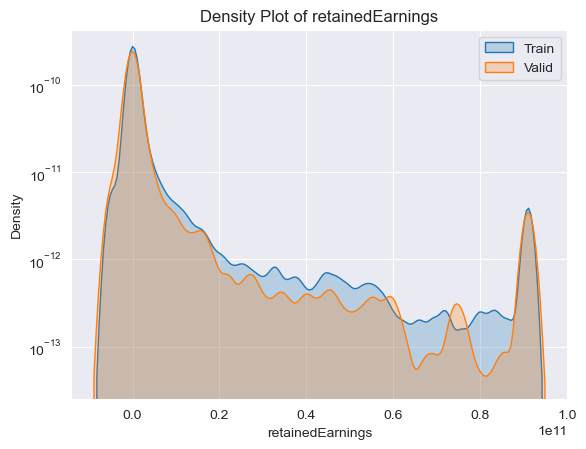

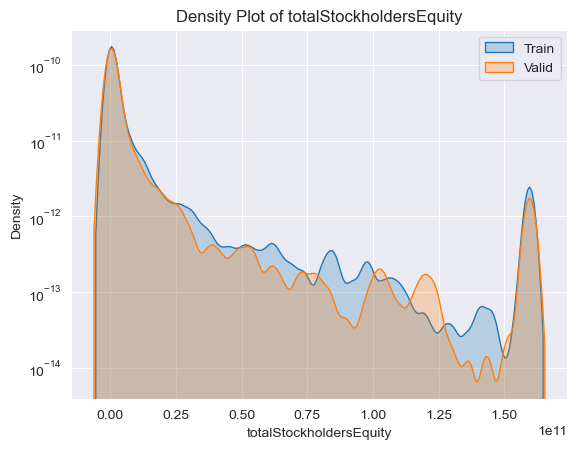

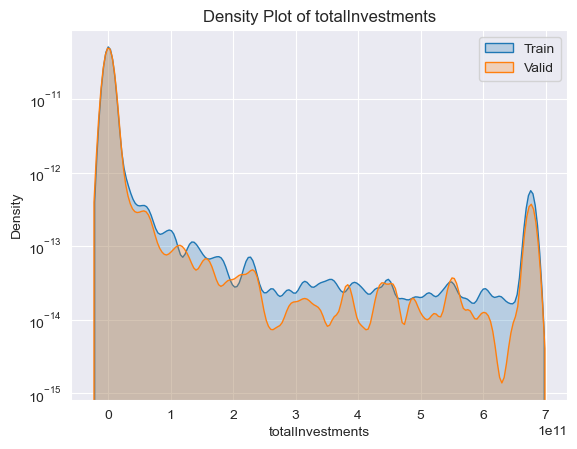

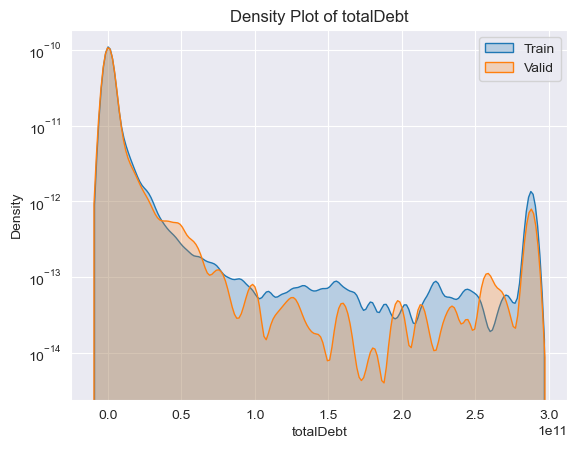

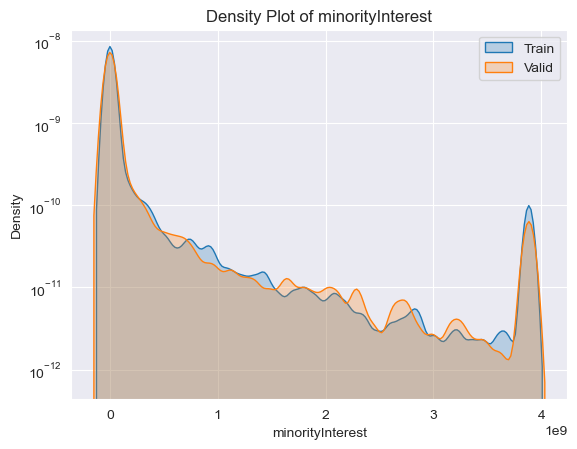

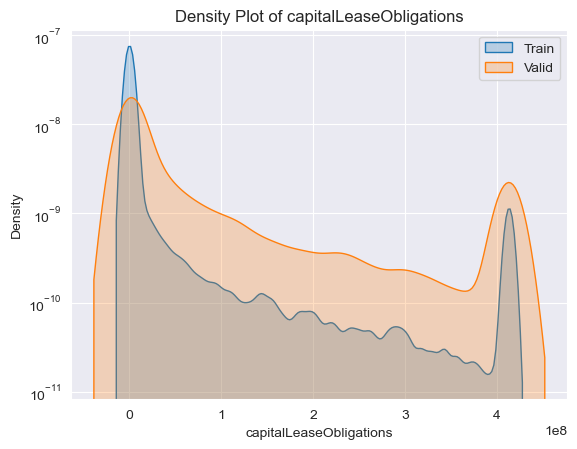

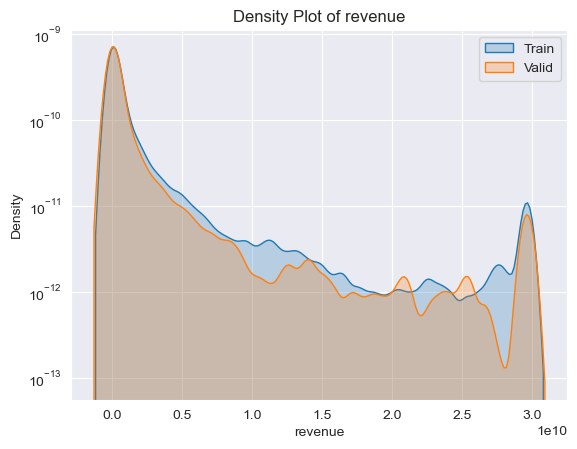

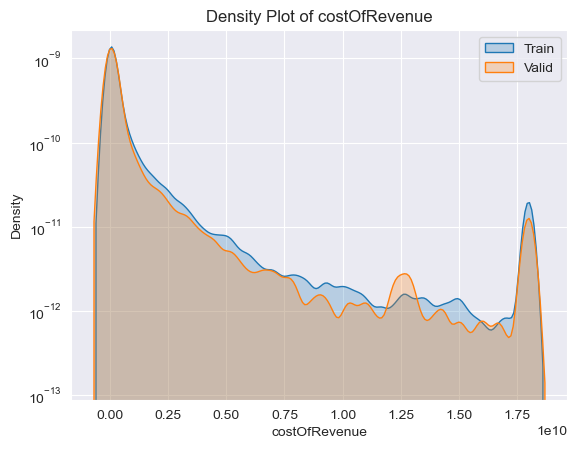

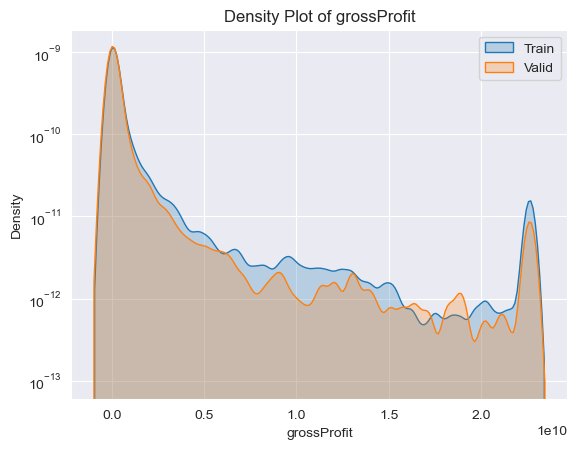

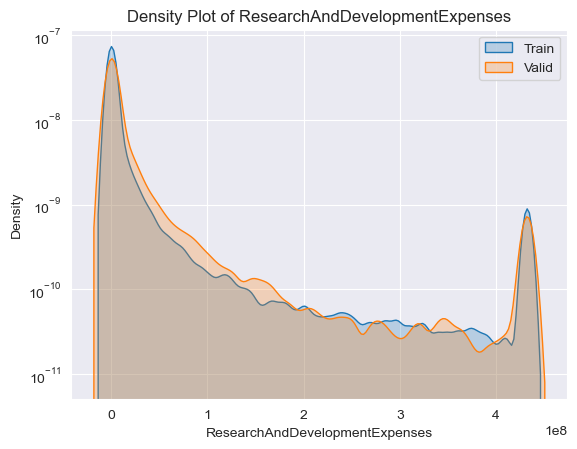

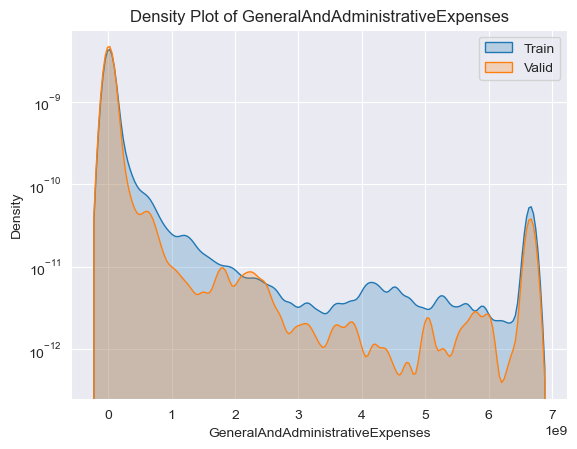

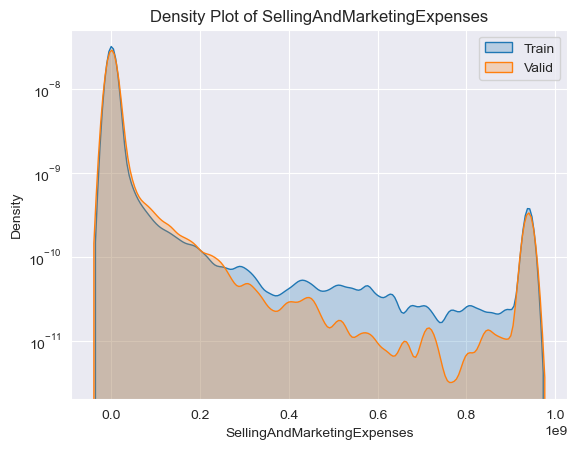

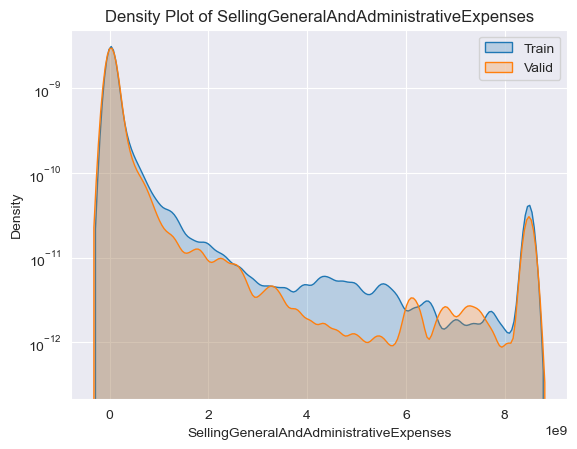

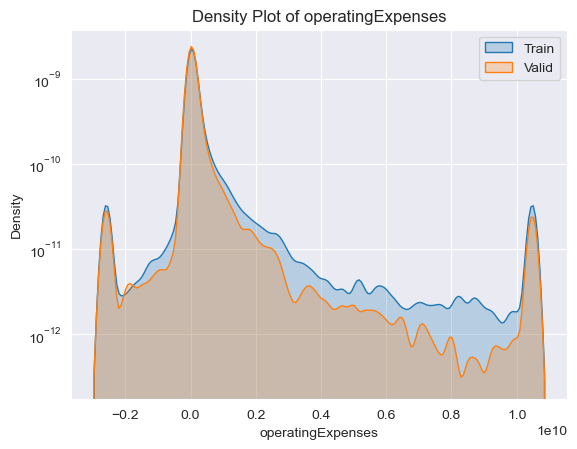

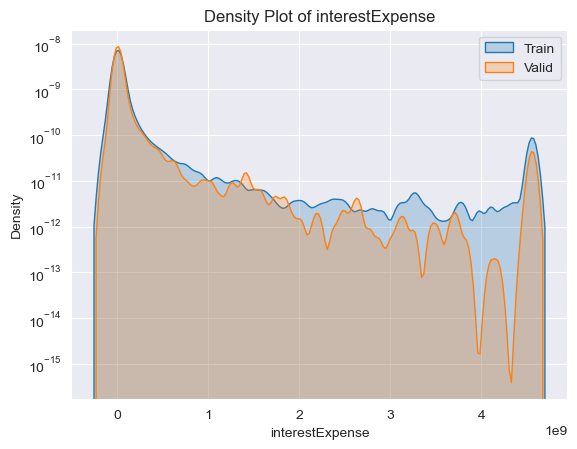

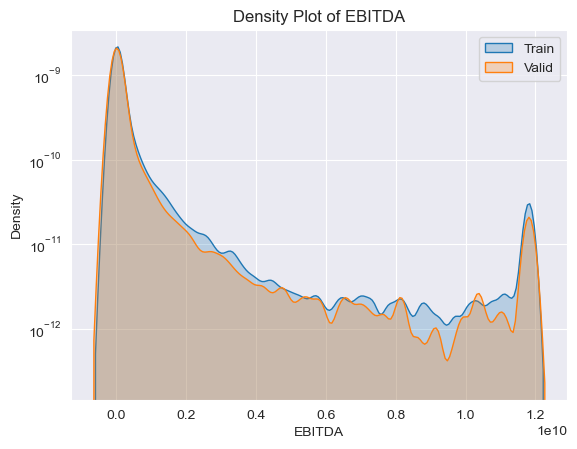

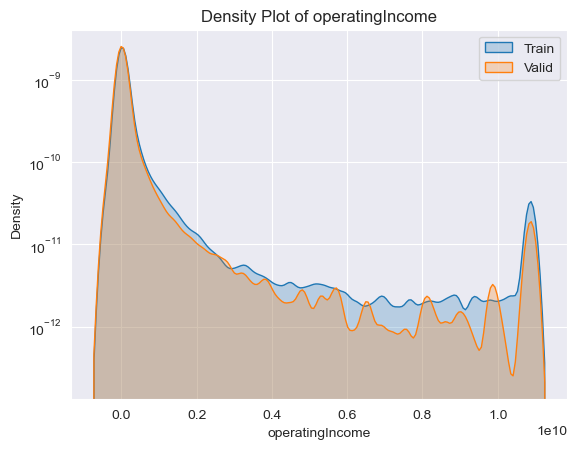

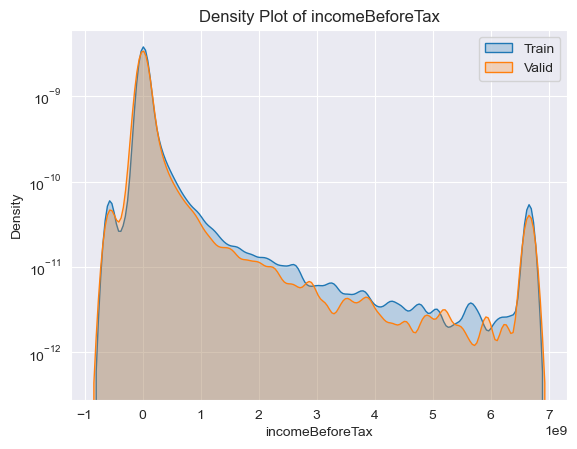

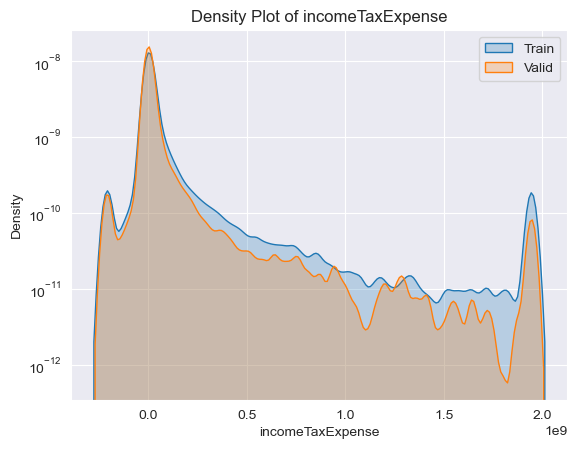

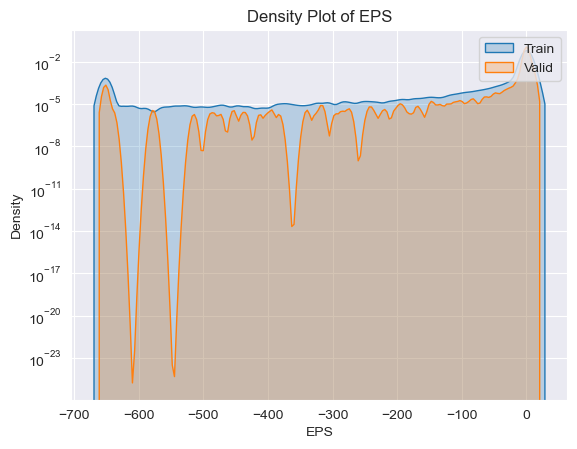

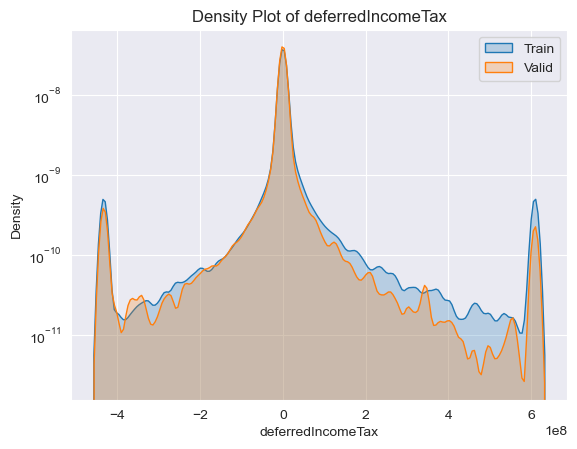

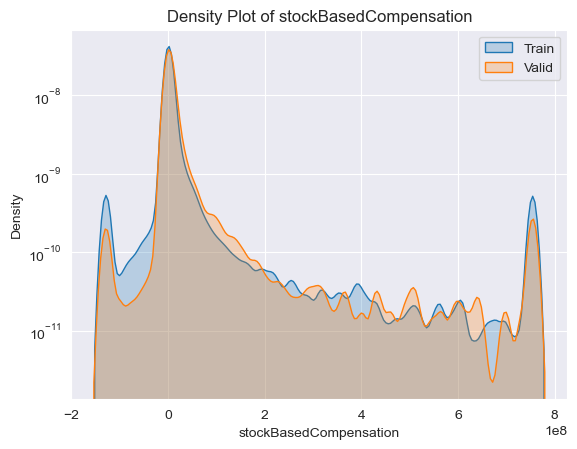

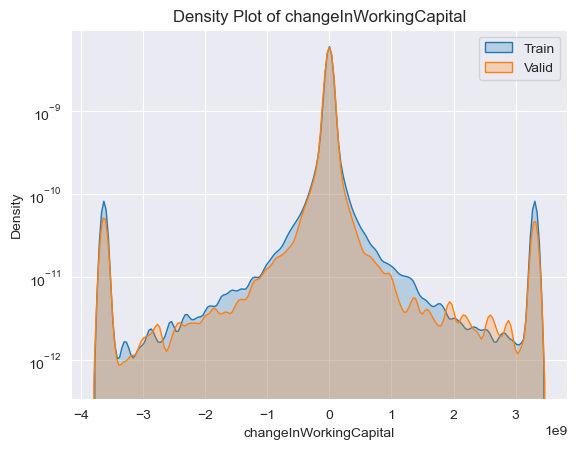

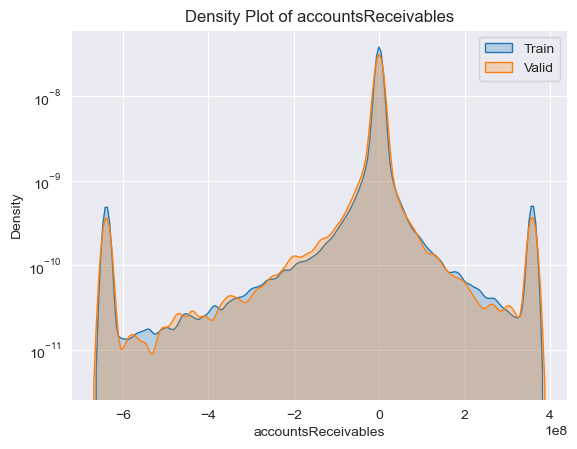

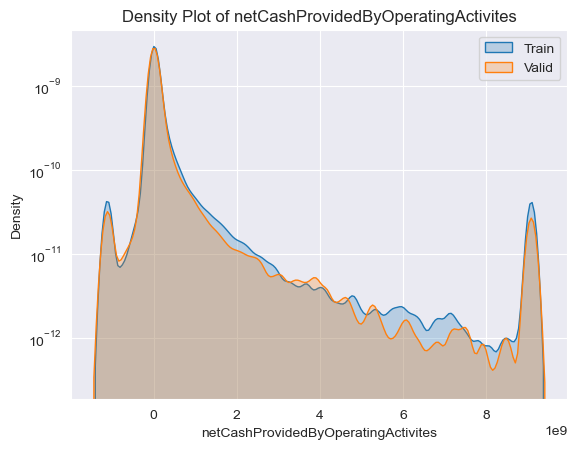

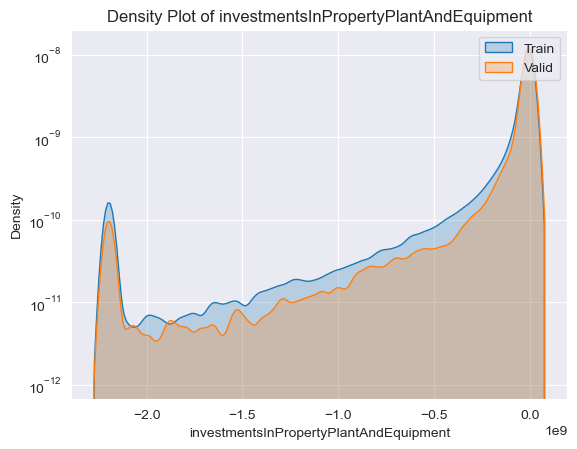

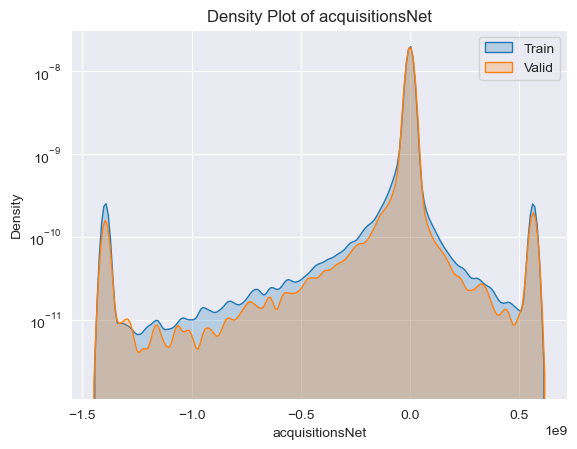

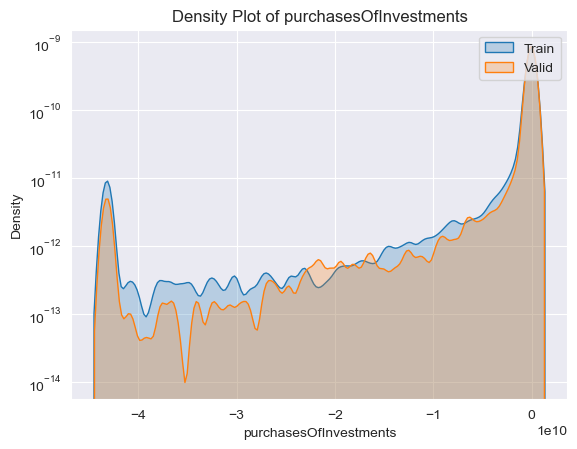

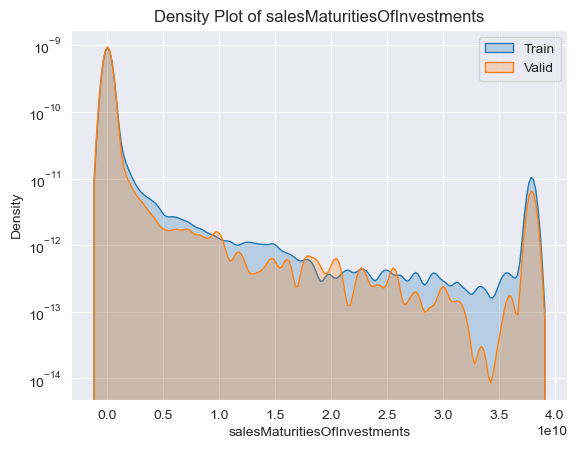

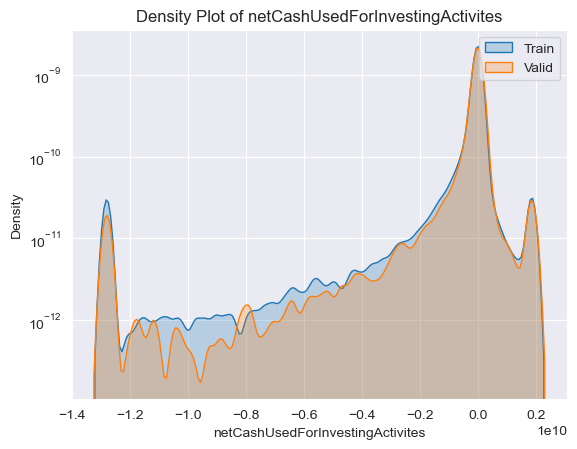

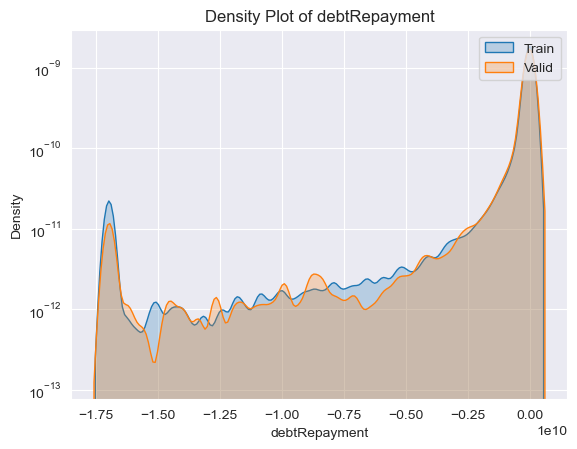

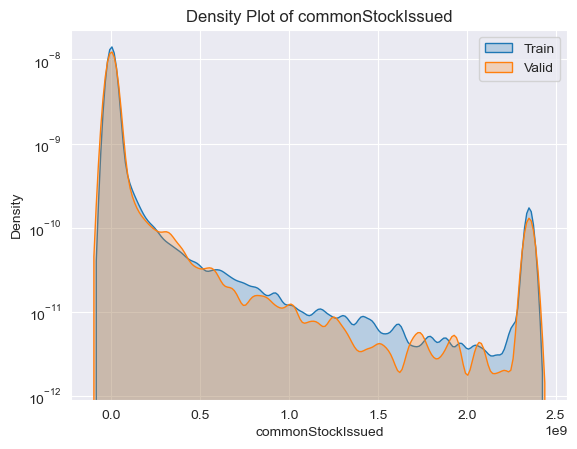

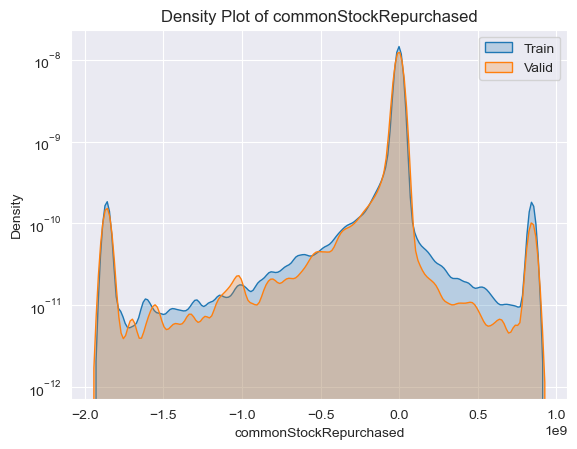

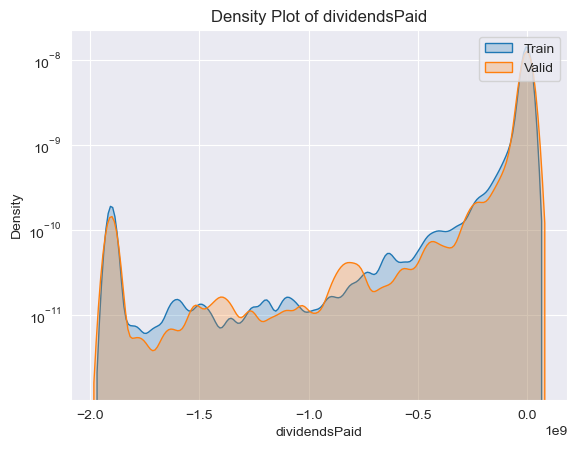

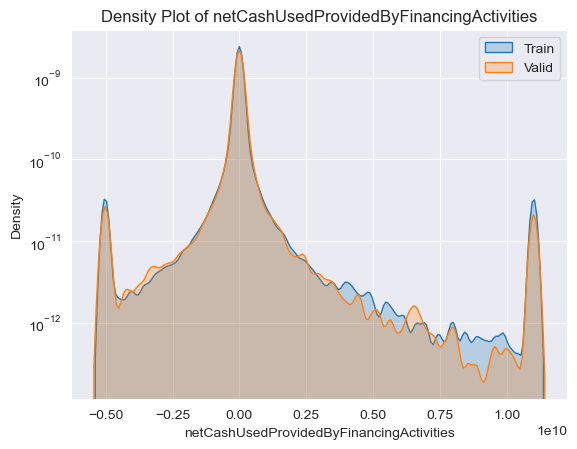

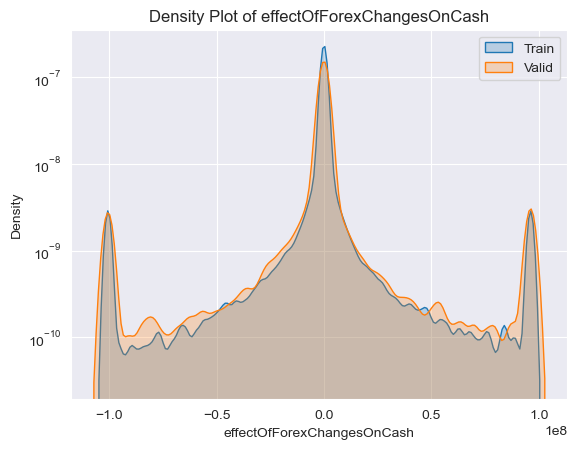

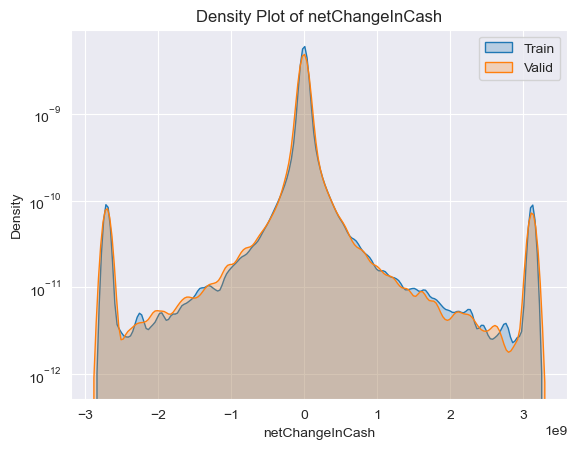

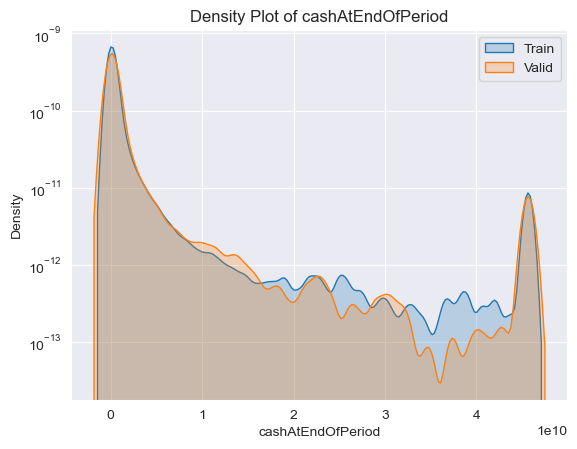

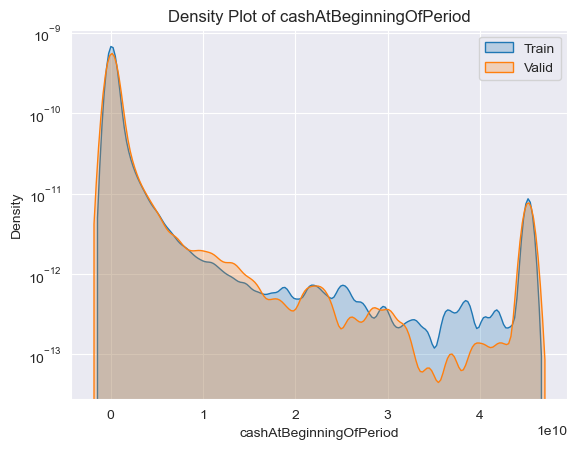

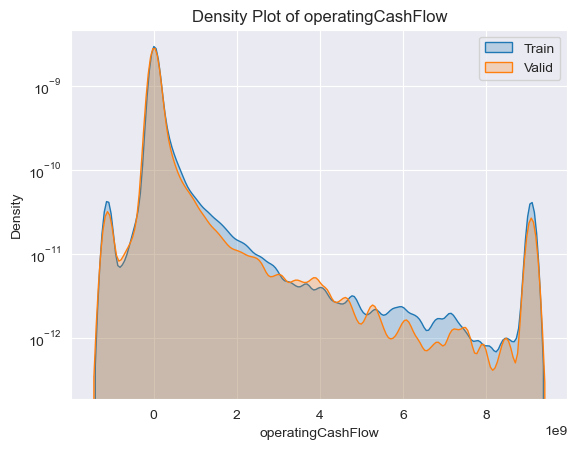

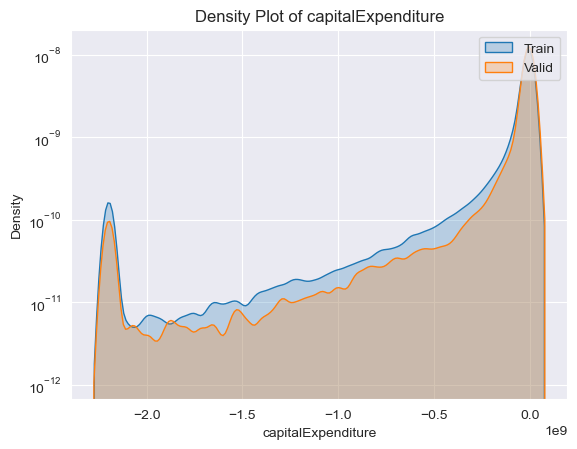

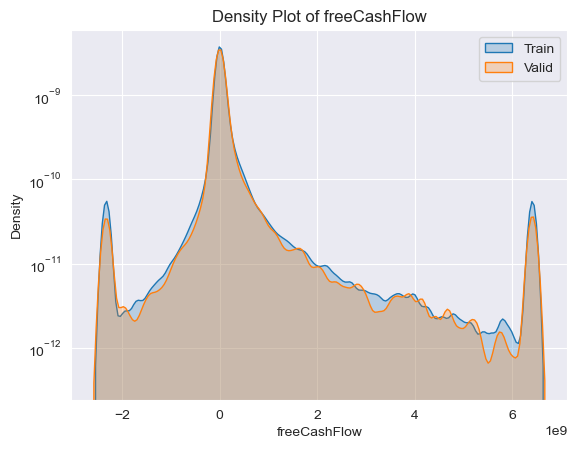

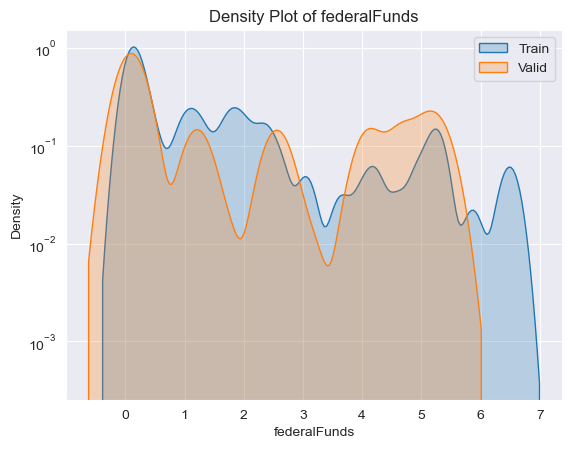

In [11]:
def plot_density(df1, df2, column):
    sns.kdeplot(df1[column], fill=True, label='Train')
    sns.kdeplot(df2[column], fill=True, label='Valid')
    plt.title(f'Density Plot of {column}')
    plt.legend()
    plt.yscale('log')
    plt.show()


for col in train.columns:
    plot_density(train, valid, col)